<a href="https://colab.research.google.com/github/VidhyaKishor27/Pythonbasic/blob/main/Python_miniproject_powerlifting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1 & 2. Top 10 States of Men, Women

In [12]:
# Top 10 States of Men, Women & pie, bar chart for top20-30 states:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/Python training/Miniproject - python/openpowerlifting-2021-12-10-b420db66.csv', dtype={'Sex':str,'State':str})
men_only=data[data["Sex"] == "M"]
women_only=data[data["Sex"] == "F"]
m=men_only.groupby(['State']).size().sort_values(ascending=False)
w=women_only.groupby(['State']).size().sort_values(ascending=False)
print("Top 10 States for Men:")
print(m.head(10))
print("Top 10 States for Women:")
print(w.head(10))






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-12-aeef788fb639>:8: DtypeWarning: Columns (35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/content/drive/MyDrive/Python training/Miniproject - python/openpowerlifting-2021-12-10-b420db66.csv', dtype={'Sex':str,'State':str})


Top 10 States for Men:
State
CA    32456
TX    23517
OH    11486
FL    11341
PA    10857
NC    10510
NY     9523
VA     9312
ON     9052
AZ     7632
dtype: int64
Top 10 States for Women:
State
CA    14639
TX    11432
FL     5199
WI     4396
WA     4256
NY     4168
OH     4110
PA     4003
VA     3781
NC     3744
dtype: int64


### 3 & 4 Plot pie chart and bar chart for Men & WomenTop 20-30 states.
   (Plot one with Matplotlib and one with Seaborn)
    


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-13-ec697eb82d07>:7: DtypeWarning: Columns (35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/content/drive/MyDrive/Python training/Miniproject - python/openpowerlifting-2021-12-10-b420db66.csv', dtype={'Sex':str,'State':str})


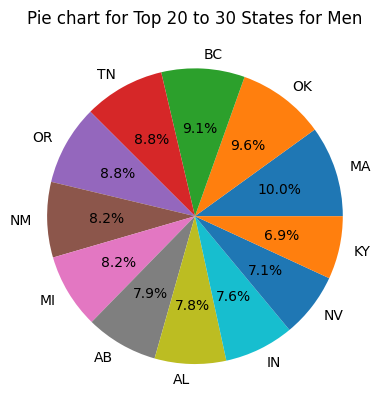

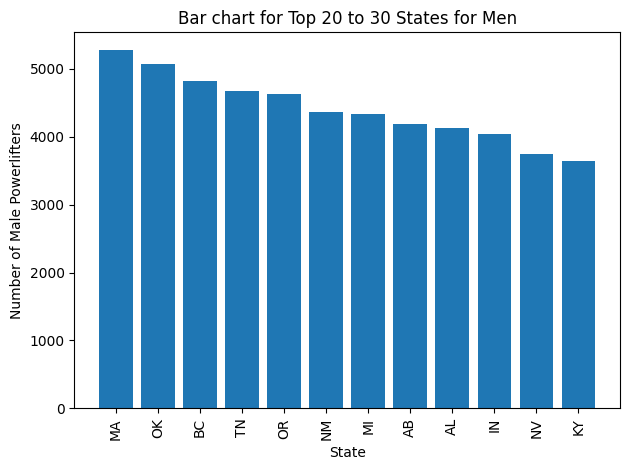

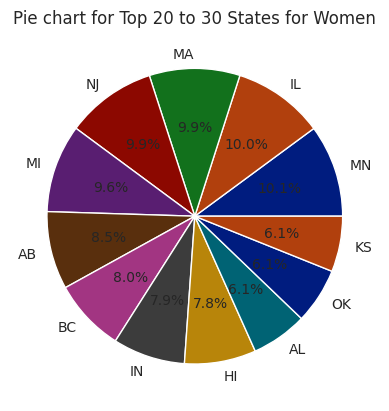

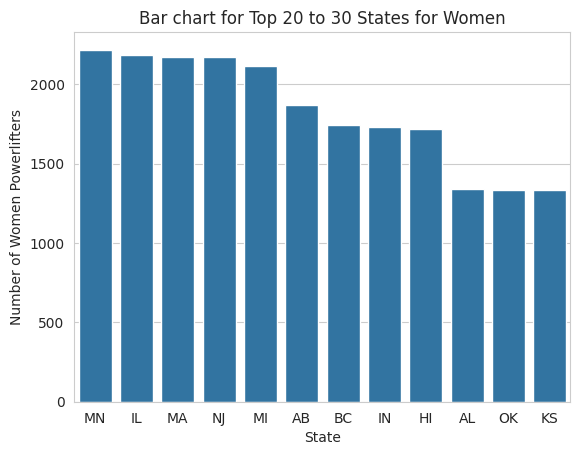

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/Python training/Miniproject - python/openpowerlifting-2021-12-10-b420db66.csv', dtype={'Sex':str,'State':str})
men_only=data[data["Sex"] == "M"]
women_only=data[data["Sex"] == "F"]
m=men_only.groupby(['State']).size().sort_values(ascending=False)
w=women_only.groupby(['State']).size().sort_values(ascending=False)
m_top20=m.iloc[19:31]
w_top20=w.iloc[19:31]
#print(m_top20)
plt.pie(m_top20, labels=m_top20.index,autopct="%1.1f%%")
plt.title("Pie chart for Top 20 to 30 States for Men")
plt.show()
plt.bar(m_top20.index,m_top20.values)
plt.xlabel("State")
plt.ylabel("Number of Male Powerlifters")
plt.title("Bar chart for Top 20 to 30 States for Men")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()
seaborn_color=sns.color_palette("dark")
seaborn_style=sns.set_style("whitegrid")
plt.pie(w_top20, labels=w_top20.index,autopct="%1.1f%%",colors=seaborn_color)
plt.title("Pie chart for Top 20 to 30 States for Women")
plt.show()
sns.set_style('whitegrid')
sns.barplot(x=w_top20.index,y=w_top20.values)
plt.xlabel("State")
plt.ylabel("Number of Women Powerlifters")
plt.title("Bar chart for Top 20 to 30 States for Women")
plt.show()

### 5 & 6. Top 10 states for Men & Women in year 2021 (Use Custom Function)


In [ ]:
# Top 10 States for year 2021
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/Python training/Miniproject - python/openpowerlifting-2021-12-10-b420db66.csv', dtype='unicode', low_memory=False)
men_only=data[data["Sex"] == "M"]
women_only=data[data["Sex"] == "F"]
men_only_new=men_only.copy() # Create a copy of view dataframe to avoid chainned assignment error i.e setting with copy warning - warning arises when you try to modify a DataFrame that might be a view of another DataFrame.
men_only_new['Date']=pd.to_datetime(men_only_new['Date']).dt.year # converting date format to year
men_only=men_only_new # Assign back to the original variable
m_yr_only=men_only.query('Date == 2021')
m=m_yr_only.groupby(['State']).size().sort_values(ascending=False)
print(" Top 10 states for Men in year 2021")
print(m.head(10))
women_only_new=women_only.copy() # Create a copy of view dataframe to avoid chainned assignment error i.e setting with copy warning - warning arises when you try to modify a DataFrame that might be a view of another DataFrame.
women_only_new['Date']=pd.to_datetime(women_only_new['Date']).dt.year # converting date format to year
women_only=women_only_new # Assign back to the original variable
w_yr_only=women_only.query('Date == 2021')
w=women_only.groupby(['State']).size().sort_values(ascending=False)
print(" Top 10 states for Women in year 2021")
print(w.head(10))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Top 10 states for Men in year 2021
State
CA    3384
TX    3037
FL    1781
OH    1529
PA    1183
VA    1156
NC    1109
NY    1033
GA     935
MO     893
dtype: int64
 Top 10 states for Women in year 2021
State
CA    14639
TX    11432
FL     5199
WI     4396
WA     4256
NY     4168
OH     4110
PA     4003
VA     3781
NC     3744
dtype: int64


### 7. Stack bar chart for men vs women X axis -> 18-30 | 31-40 | 41-50 | 51-60


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


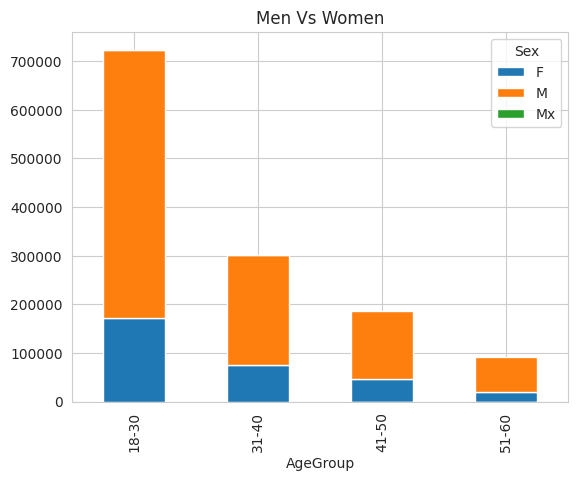

In [14]:
#Stack bar chart for men vs women X axis -> 18-30 | 31-40 | 41-50 | 51-60
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/Python training/Miniproject - python/openpowerlifting-2021-12-10-b420db66.csv', dtype={'Sex':str,'Age':float},low_memory=False )
#Categoring Age col values as per bin values
bin=[18,31,41,51,61]
category=['18-30','31-40','41-50','51-60']
data['AgeGroup']=pd.cut(data['Age'],bins=bin,labels=category) #to create AgeGroup column based on the bin
new_agegroup_data=data.groupby(['AgeGroup','Sex']).size().unstack()
new_agegroup_data.plot(kind='bar',stacked=True,title="Men Vs Women")
plt.show()




### 8 & 9 Pie chart for men & women w.r.t age group (18-30 | 31-40 | 41-50 | 51-60)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


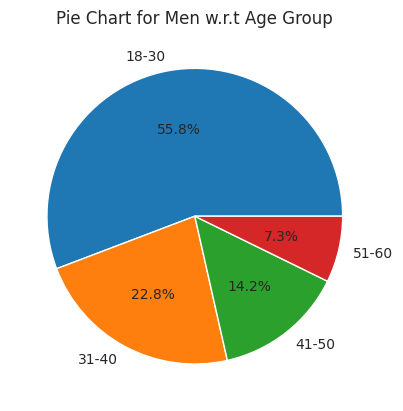

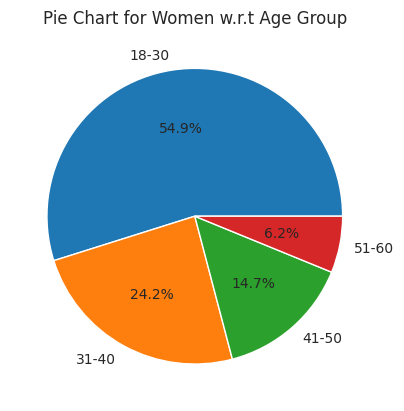

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/Python training/Miniproject - python/openpowerlifting-2021-12-10-b420db66.csv', dtype={'Sex':str,'Age':float},low_memory=False )
#Categoring Age col values as per bin values
bin=[18,31,41,51,61]
category=['18-30','31-40','41-50','51-60']
data['AgeGroup']=pd.cut(data['Age'],bins=bin,labels=category) #to create AgeGroup column based on the bin
men_only=data[data["Sex"] == "M"]
m_agegroup_data=men_only.groupby(['AgeGroup']).size()
sns.set_style("whitegrid")
plt.pie(m_agegroup_data,labels=m_agegroup_data.index,autopct="%1.1f%%")
plt.title("Pie Chart for Men w.r.t Age Group")
plt.show()
women_only=data[data['Sex']=="F"]
w_agegroup_data=women_only.groupby(["AgeGroup"]).size()
sns.set_style("white")
plt.pie(w_agegroup_data,labels=w_agegroup_data.index,autopct="%1.1f%%")
plt.title("Pie Chart for Women w.r.t Age Group")
plt.show()


### 10 & 11. Histogram for men & women by age (use Age for binning purpose)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


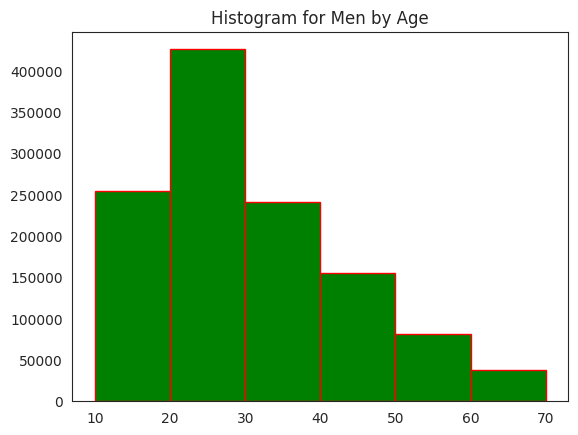

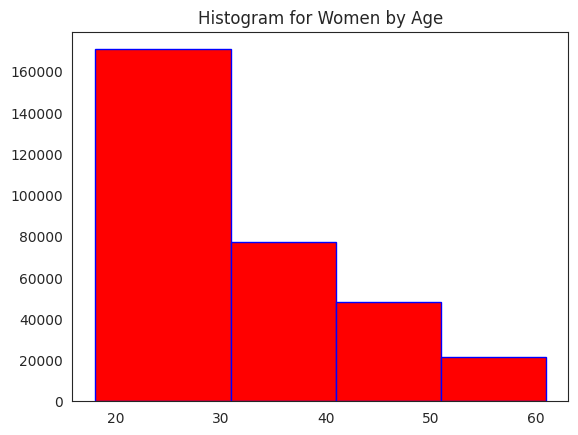

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('/content/drive/MyDrive/Python training/Miniproject - python/openpowerlifting-2021-12-10-b420db66.csv', dtype={'Sex':str,'Age':float},low_memory=False )
bin=[18,31,41,51,61]
category=['18-30','31-40','41-50','51-60']
data["AgeGroup"]=pd.cut(data['Age'],bins=bin,labels=category)
men_only=data[data["Sex"]=="M"]
women_only=data[data["Sex"]=="F"]
agebin=[10,20,30,40,50,60,70]
agebin2=[18,31,41,51,61]
plt.hist(men_only['Age'],bins=agebin,color="Green",edgecolor="Red")
plt.title("Histogram for Men by Age")
plt.show()
plt.hist(women_only['Age'],bins=agebin2,color="Red",edgecolor="Blue")
plt.title("Histogram for Women by Age")
plt.show()
